<a href="https://colab.research.google.com/github/ViktoryLoktionova/dl_nlp_imdb/blob/main/dl_nlp_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
max_words=10000

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [ ]:
x_train[3]

[1,
 4,
 2,
 2,
 33,
 2,
 4,
 2,
 432,
 111,
 153,
 103,
 4,
 2,
 13,
 70,
 131,
 67,
 11,
 61,
 2,
 744,
 35,
 2,
 761,
 61,
 2,
 452,
 2,
 4,
 985,
 7,
 2,
 59,
 166,
 4,
 105,
 216,
 2,
 41,
 2,
 9,
 15,
 7,
 35,
 744,
 2,
 31,
 8,
 4,
 687,
 23,
 4,
 2,
 2,
 6,
 2,
 42,
 38,
 39,
 121,
 59,
 456,
 10,
 10,
 7,
 265,
 12,
 575,
 111,
 153,
 159,
 59,
 16,
 2,
 21,
 25,
 586,
 482,
 39,
 4,
 96,
 59,
 716,
 12,
 4,
 172,
 65,
 9,
 579,
 11,
 2,
 4,
 2,
 5,
 2,
 7,
 2,
 17,
 13,
 2,
 12,
 19,
 6,
 464,
 31,
 314,
 11,
 2,
 6,
 719,
 605,
 11,
 8,
 202,
 27,
 310,
 4,
 2,
 2,
 8,
 2,
 58,
 10,
 10,
 537,
 2,
 180,
 40,
 14,
 413,
 173,
 7,
 263,
 112,
 37,
 152,
 377,
 4,
 537,
 263,
 846,
 579,
 178,
 54,
 75,
 71,
 476,
 36,
 413,
 263,
 2,
 182,
 5,
 17,
 75,
 2,
 922,
 36,
 279,
 131,
 2,
 17,
 2,
 42,
 17,
 35,
 921,
 2,
 192,
 5,
 2,
 2,
 19,
 2,
 217,
 2,
 2,
 537,
 2,
 2,
 5,
 736,
 10,
 10,
 61,
 403,
 9,
 2,
 40,
 61,
 2,
 5,
 27,
 2,
 159,
 90,
 263,
 2,
 2,
 309,
 8,
 178,


In [ ]:
y_train[3]

1

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
reverse_word_index = dict()
for key, value in word_index.items():
  reverse_word_index[value] = key

In [ ]:
for i in range (1, 21):
  print(i, '-', reverse_word_index[i])


1 - the
2 - and
3 - a
4 - of
5 - to
6 - is
7 - br
8 - in
9 - it
10 - i
11 - this
12 - that
13 - was
14 - as
15 - for
16 - with
17 - movie
18 - but
19 - film
20 - on


Раскодируем отзыв

In [ ]:
index = 3
message = ''
for code in x_train[index]:
  word = reverse_word_index.get(code - 3, '?')
  message += word + ' '
message  

"? the ? ? at ? the ? sort many years after the ? i can still see in my ? eye an ? lady my ? mother ? the battle of ? she makes the characters come ? her ? is that of an eye ? one to the events on the ? ? a ? or so from where she lives br br of course it happened many years before she was ? but you wouldn't guess from the way she tells it the same story is told in ? the ? and ? of ? as i ? it with a friend one night in ? a local cut in to give his version the ? ? to ? time br br stories ? down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our ? world and as we ? older they maybe still ? as ? or as an emotional ? fact and ? ? with ? role ? ? stories ? ? and mystery br br my name is ? like my ? and his ? before him our ? ? himself to us and also ? the story that ? back through ? it ? stories within stories stories that ? the ? wonder of ? its ? ? ? in ? the stuff of ? yet ? is ? in reality this is what gives it i

Подготовка данных для обучения

In [ ]:
maxlen = 200

In [ ]:
x_train = pad_sequences(x_train, maxlen = maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, padding='post')

In [ ]:
x_train[3]

array([  4, 341,   7,  27, 846,  10,  10,  29,   9,   2,   8,  97,   6,
       236,   2,   2,   8,   4,   2,   7,  31,   7,   2,  91,   2,   2,
        70,   4, 882,  30, 579,  42,   9,  12,  32,  11, 537,  10,  10,
        11,  14,  65,  44, 537,  75,   2,   2,   2,   2,   2,   4,   2,
         7, 154,   5,   4, 518,  53,   2,   2,   7,   2, 882,  11, 399,
        38,  75, 257,   2,  19,   2,  17,  29, 456,   4,  65,   7,  27,
       205, 113,  10,  10,   2,   4,   2,   2,   9, 242,   4,  91,   2,
         2,   5,   2, 307,  22,   7,   2, 126,  93,  40,   2,  13, 188,
         2,   2,  19,   4,   2,   7,   2, 537,  23,  53, 537,  21,  82,
        40,   2,  13,   2,  14, 280,  13, 219,   4,   2, 431, 758, 859,
         4, 953,   2,   2,   7,   2,   5,  94,  40,  25, 238,  60,   2,
         4,   2, 804,   2,   7,   4,   2, 132,   8,  67,   6,  22,  15,
         9, 283,   8,   2,  14,  31,   9, 242, 955,  48,  25, 279,   2,
        23,  12,   2, 195,  25, 238,  60, 796,   2,   4, 671,   

Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs = 25,
                    batch_size = 128,
                    validation_split=0.1)

Epoch 1/25
176/176 [==============================] - 1s 5ms/step - loss: 0.4584 - accuracy: 0.7671 - val_loss: 1.2113 - val_accuracy: 0.5220
Epoch 2/25
176/176 [==============================] - 1s 5ms/step - loss: 0.4295 - accuracy: 0.7902 - val_loss: 1.2292 - val_accuracy: 0.5232
Epoch 3/25
176/176 [==============================] - 1s 5ms/step - loss: 0.4096 - accuracy: 0.8020 - val_loss: 1.3156 - val_accuracy: 0.5144
Epoch 4/25
176/176 [==============================] - 1s 5ms/step - loss: 0.3961 - accuracy: 0.8099 - val_loss: 1.3640 - val_accuracy: 0.5248
Epoch 5/25
176/176 [==============================] - 1s 5ms/step - loss: 0.3636 - accuracy: 0.8326 - val_loss: 1.4285 - val_accuracy: 0.5132
Epoch 6/25
176/176 [==============================] - 1s 5ms/step - loss: 0.3387 - accuracy: 0.8436 - val_loss: 1.4484 - val_accuracy: 0.5264
Epoch 7/25
176/176 [==============================] - 1s 5ms/step - loss: 0.3076 - accuracy: 0.8617 - val_loss: 1.5695 - val_accuracy: 0.5144
Epoch 

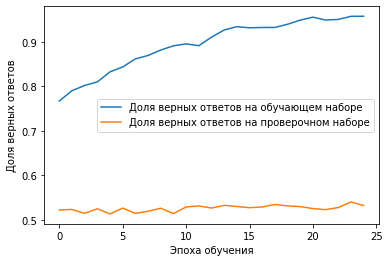

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


Ярковыраженное переобучение. Проверяем на тестовом наборе данных.


In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 3s 3ms/step - loss: 3.5708 - accuracy: 0.5102


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Улучшение нейросети с помощью представления в виде one hot encoding
 https://colab.research.google.com/gist/ViktoryLoktionova/db30d6c338143c84d545145f9210abd7/dl_nlp_imdb_ohe.ipynb